In [296]:
# import basic libraries
import yt
import numpy as np
import matplotlib.pyplot as plt
from math import log, log10
from astropy import units as u

# import halo catalogue func
from yt.analysis_modules.halo_analysis.api import *

# load halo dataset
halos_ds = yt.load('./LG4_2048_40pc/rd0070/halo_catalogs/catalog/catalog0070_thres160.0.h5')

yt : [INFO     ] 2017-06-26 15:19:56,739 Parameters: current_time              = 3.75573046409e+16
yt : [INFO     ] 2017-06-26 15:19:56,741 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2017-06-26 15:19:56,744 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2017-06-26 15:19:56,747 Parameters: domain_right_edge         = [  2.22535525e+25   2.22535525e+25   2.22535525e+25]
yt : [INFO     ] 2017-06-26 15:19:56,750 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2017-06-26 15:19:56,752 Parameters: current_redshift          = 4.99999998323
yt : [INFO     ] 2017-06-26 15:19:56,755 Parameters: omega_lambda              = 0.712
yt : [INFO     ] 2017-06-26 15:19:56,757 Parameters: omega_matter              = 0.288
yt : [INFO     ] 2017-06-26 15:19:56,759 Parameters: hubble_constant           = 0.6933


In [10]:
import tempfile
import shutil
import os

# Create temporary directory for storing files
tmpdir = tempfile.mkdtemp()

In [11]:
# Instantiate a catalog using those two paramter files
hc = HaloCatalog(halos_ds=halos_ds, output_dir=os.path.join(tmpdir, 'halo_catalog'))
hc.load()

yt : [INFO     ] 2017-06-23 15:38:48,014 Allocating for 9.178e+03 particles (index particle type 'all')
yt : [INFO     ] 2017-06-23 15:38:48,033 Identified 3.025e+03 octs


In [38]:
# specify boundaries of zoom-in box
# scaling factor multiplied by info from text file 
# units in cm
xmin = 2.22535525e+25*0.39319589 * u.cm
ymin = 2.22535525e+25*0.42984636 * u.cm
zmin = 2.22535525e+25*0.41706725 * u.cm

xmax = 2.22535525e+25*0.56298484 * u.cm
ymax = 2.22535525e+25*0.55089246 * u.cm
zmax = 2.22535525e+25*0.56698254 * u.cm

In [56]:
# find masses of halos
masslist = []

for halo in hc.halo_list:
    # find coord and mass of halo
    x = halo.quantities.get('particle_position_x') * u.cm
    y = halo.quantities.get('particle_position_y') * u.cm
    z = halo.quantities.get('particle_position_z') * u.cm
    mass = halo.quantities.get('particle_mass').in_units('Msun') * u.Msun
    
    # check if halo is inside zoom-in box
    if xmin <= x < xmax and ymin <= y < ymax and zmin <= z < zmax:
        masslist.append(mass.value)


In [57]:
masslist = np.array(masslist)

In [137]:
bins = np.geomspace(start=1e6, stop=1e11, num=50)

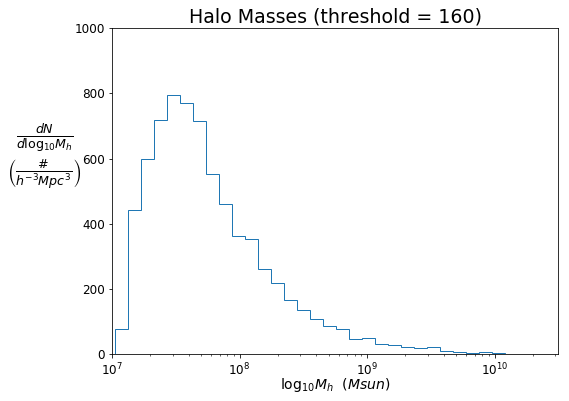

In [192]:
# create histogram
plt.figure(figsize=(8,6))
plt.hist(masslist, bins, histtype='step', fill = False)
plt.title("Halo Masses (threshold = 160)", size = 19)
plt.axis([1e7, 10**10.5, 0, 1000])


# create axis labels
xlab = "$\log_{10}M_h}$  $(Msun)$"
ylab = r"$\frac{dN}{d\log_{10}M_h}$"+"\n"+r"$\left(\frac{\#}{h^{-3}Mpc^3}\right)$"
plt.xlabel(xlab, size = 14, labelpad= -2)
plt.ylabel(ylab, rotation = 0, size = 18, labelpad= 30)

# create axis ticks 
plt.xscale('log')
plt.tick_params(axis='x', which='major', labelsize=12)
plt.tick_params(axis='y', which='major', labelsize=12)

#show and save
plt.show()

#plt.savefig('./LG4_2048_40pc/rd0070/graph2.png', dpi = 300)

In [272]:
log_mass = np.log(masslist) / log(10)
density, bin_edges = np.histogram(log_mass, bins= np.linspace(7, 10, 30))
log_density = np.log(density) / log(10)

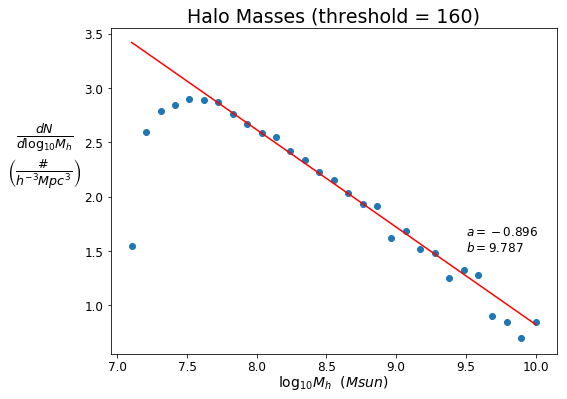

In [295]:
# specify figure size
plt.figure(figsize=(8,6))

#determine line of best fit
bin_edges_fit = bin_edges[6:-4]
log_density_fit = log_density[5:-4]
par = np.polyfit(bin_edges_fit, log_density_fit, 1, full=True)
slope, intercept = par[0][0], par[0][1]

# plot data and line
bin_edges_red = bin_edges[1::]
plt.scatter(bin_edges_red, log_density)
plt.plot(bin_edges_red, slope * bin_edges_red + intercept, color = 'red')
plt.title("Halo Masses (threshold = 160)", size = 19)

# create axis labels
xlab = "$\log_{10}M_h}$  $(Msun)$"
ylab = r"$\frac{dN}{d\log_{10}M_h}$"+"\n"+r"$\left(\frac{\#}{h^{-3}Mpc^3}\right)$"
plt.xlabel(xlab, size = 14, labelpad= 0)
plt.ylabel(ylab, rotation = 0, size = 18, labelpad= 40)

# create axis ticks 
plt.yscale('linear')
plt.tick_params(axis='x', which='major', labelsize=12)
plt.tick_params(axis='y', which='major', labelsize=12)

# add slope and intercept
annotation = "$a = {:1.3f}$ \n$b = {:1.3f}$".format(slope, intercept)
"a = " + str(slope) + " b = " + str(intercept)
plt.text(9.5, 1.5, annotation, size = 12)

#show and save
plt.show()


In [275]:
par

(array([-0.70967004,  8.05047807]),
 array([ 3.20652139]),
 2,
 array([ 1.41241545,  0.07129239]),
 6.4392935428259079e-15)

In [279]:
bin_edges.size, log_density.size, 

(30, 29)